In [5]:
import pandas as pd
import re
from collections import defaultdict

# Load your essay file
path = "/home/semipro321/OneDrive/School/McGill/Research Projects/Essay/"
df = pd.read_csv(path + "essays_corrected_200.csv")

# Load and parse the MFD dictionary
dic_path = "/home/semipro321/OneDrive/School/McGill/Research Projects/Essay/Code/jacob/moral.dic"
with open(dic_path, "r") as f:
    lines = f.readlines()

category_map = {
    "01": "HarmVirtue",
    "02": "HarmVice",
    "03": "FairnessVirtue",
    "04": "FairnessVice",
    "05": "IngroupVirtue",
    "06": "IngroupVice",
    "07": "AuthorityVirtue",
    "08": "AuthorityVice",
    "09": "PurityVirtue",
    "10": "PurityVice",
    "11": "MoralityGeneral"
}

# Build regex dictionary
mfd_dict = defaultdict(list)
# Correct parsing of .dic file with multiple tabs/spaces
for line in lines:
    if line.strip() == "" or line.startswith("%"):
        continue
    parts = re.split(r"\s{2,}|\t+", line.strip())  # split on tabs or 2+ spaces
    word_pattern = parts[0].replace("*", r"\w*")
    for cat in parts[1:]:
        cat = cat.strip()
        if cat in category_map:
            mfd_dict[category_map[cat]].append(word_pattern)

# Compile regex patterns once for efficiency
compiled_mfd = {
    cat: [re.compile(pattern, re.IGNORECASE) for pattern in patterns]
    for cat, patterns in mfd_dict.items()
}

# Function to count moral words in an essay
def count_mfd_words(text, compiled_mfd):
    counts = {cat: 0 for cat in compiled_mfd}
    for cat, regexes in compiled_mfd.items():
        for pattern in regexes:
            matches = pattern.findall(text)
            counts[cat] += len(matches)
    return counts

# Apply to each essay
results = df["corrected"].apply(lambda x: count_mfd_words(str(x), compiled_mfd))
mfd_df = pd.DataFrame(results.tolist())

# Combine with original dataframe
df_mfd = pd.concat([df, mfd_df], axis=1)

# View result
df_mfd.head()


,Text,ID,Words,cleaned_text,corrected,HarmVirtue,HarmVice,FairnessVirtue,FairnessVice,IngroupVirtue,IngroupVice,AuthorityVirtue,AuthorityVice,PurityVirtue,PurityVice,MoralityGeneral
0,ID: N17933D----------------------I live in a f...,N17933D,158.0,I live in a flat with my friend who is a teach...,I live in a flat with my friend who is a teach...,0,0,0,0,0,0,0,0,0,0,1
1,ID: N25886L----------------------I am 25 and l...,N25886L,424.0,I am 25 and living in a old cottega hose I am ...,I am 25 and living in an old cottage house. I ...,0,0,0,0,2,0,1,0,0,0,3
2,ID: N17099U----------------------On my 25 birt...,N17099U,321.0,On my 25 birthday there was a lot of things go...,On my 25th birthday there was a lot of things ...,0,0,0,0,0,0,0,0,0,0,0
3,ID: N27096W----------------------My name is [f...,N27096W,195.0,My name is [female name] [surname] and I work ...,My name is [female name] [surname] and I work ...,0,0,0,0,0,0,4,0,0,0,0
4,ID: N27472A----------------------If I was twen...,N27472A,241.0,If I was twentey five yaras of age I would get...,If I was twenty-five years of age I would get ...,0,0,0,0,0,0,0,0,0,0,3


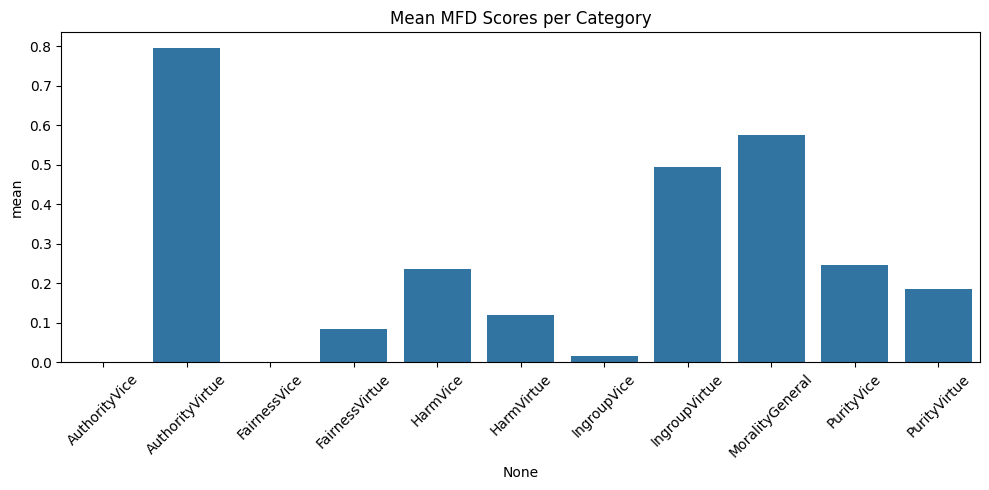

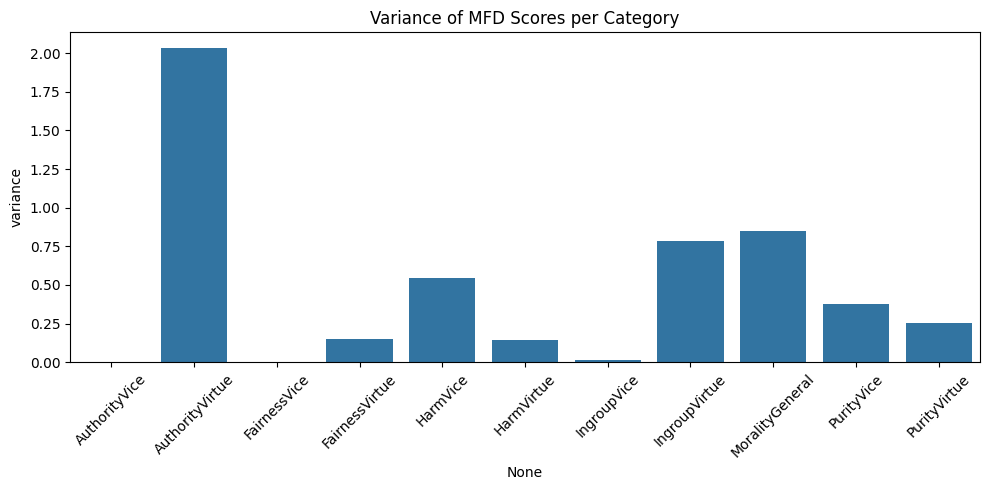

In [10]:
from scipy.stats import skew, kurtosis

# Select only the MFD columns
mfd_columns = list(mfd_df.columns.difference(df.columns))
mfd_scores = mfd_df[mfd_columns]

# Compute moments
moments = pd.DataFrame({
    "mean": mfd_scores.mean(),
    "variance": mfd_scores.var(),
    "skewness": mfd_scores.apply(skew),
    "kurtosis": mfd_scores.apply(kurtosis)
}).round(3)

# Show the results
import matplotlib.pyplot as plt
import seaborn as sns


# Optional: Visualize means and variances
plt.figure(figsize=(10, 5))
sns.barplot(x=moments.index, y=moments["mean"])
plt.title("Mean MFD Scores per Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x=moments.index, y=moments["variance"])
plt.title("Variance of MFD Scores per Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [12]:
moments

,mean,variance,skewness,kurtosis
AuthorityVice,0.000,0.000,NaN,NaN
AuthorityVirtue,0.795,2.033,2.376,5.978
FairnessVice,0.000,0.000,NaN,NaN
FairnessVirtue,0.085,0.149,4.519,19.038
HarmVice,0.235,0.542,3.912,16.683
HarmVirtue,0.120,0.146,3.885,18.869
IngroupVice,0.015,0.015,7.980,61.682
IngroupVirtue,0.495,0.784,2.694,9.796
MoralityGeneral,0.575,0.849,1.983,4.227
PurityVice,0.245,0.377,3.330,13.834


In [13]:
# Sort by AuthorityVirtue and return the top-scoring essay
top_authorityvirtue = df_mfd.sort_values(by="AuthorityVirtue", ascending=False).iloc[0]

# Print the essay and its AuthorityVirtue score
print("AuthorityVirtue Score:", top_authorityvirtue["AuthorityVirtue"])
print("\nEssay:\n", top_authorityvirtue["corrected"])


AuthorityVirtue Score: 7

Essay:
 When I am 25 years old, I'll be married to [name]. If it's two girls, [name] [name], and if it's three girls [name] [name] + [name], and if it's three boys I'll call them [name] [name] and [name]. If it's two boys [name] and [name], and if it's a girl and boy [name] and [name]. When I grow up, I want to be a Pop singer. If not an actress or a circus actor or a Pop dancer. I will hope I have a beautiful house in the countryside or valley drive. I'll take my children to my mother and father and my husband's father and mother. My interests are to look at their animals and do some gardening in my spare time. I'll sit and knit cardigans and jumpers for the children, husband, and myself. I'll lie on the bed and have a rest. I'll have modern furniture in my home, hope the house will be private. I'll let my children have their own space if I don't get married and have no children. If I do get married and have children, I'll stay with my mother and father. I'll

In [26]:
texts = df['corrected'][7]
texts

'When I am 25 I help I am sailing on a ship on the sea. I helped to have two children. one boy and one girl. I would like to be a sailor in the navy. When I am 25 years old I would like to be captain of a big shop. When I am at home I would like to see plays when I stay at home and be a sailer. I will be a framer. When I am 25 and home. I would make things and my thing. I would going out and buy things for my children. I might have a car to take my wife in it. And will look at T.V.'

In [27]:
from moralstrength.moralstrength import estimate_morals
# df['correct']
# texts = '''My dog is very loyal to me.
# My cat is not loyal, but understands my authority.
# He did not want to break the router, he was fixing it.
# It is not fair! She cheated on the exams.
# Are you pure of heart? Because I am sure not.
# Will you take care of me? I am sad.'''

texts = texts.split('\n')

result = estimate_morals(texts, process=True) # set to false if text is alredy pre-processed
print(result)

   care  fairness  loyalty  authority  purity
0   NaN       NaN      NaN        NaN     NaN


/home/semipro321/anaconda3/envs/py311/lib/python3.11/site-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)
